In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from keras.models import Model, Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.optimizers import RMSprop


Using TensorFlow backend.


In [2]:
# loading images formed by Tuhin sir algorithm 
data_photons = np.loadtxt("/home/disha/Codes/data-photon-5.out")

data_pions = np.loadtxt("/home/disha/Codes/data-pion-5.out")
print (data_photons.shape, data_pions.shape)

# assigning labels to photons and pions

y_data_photons = np.ones(32369)
y_data_pions   = np.zeros(19581)
print(y_data_photons.shape, y_data_pions.shape, data_photons.shape)

(32369, 225) (19581, 225)
(32369,) (19581,) (32369, 225)


In [3]:
# create training and testing vars
x_train_photons = data_photons[:25000,:]
x_test_photons = data_photons[25000:,:]
x_test_pions = data_pions[:,:]
print( x_test_photons.shape, x_test_pions.shape)


(7369, 225) (19581, 225)


In [9]:
input_size = 225
hidden_size1 = 100
code_size = 50

input_img = Input(shape=(input_size,))
hidden_1e = Dense(hidden_size1, activation='relu')(input_img)
#hidden_2e = Dense(hidden_size2, activation='relu')(hidden_1e)
code = Dense(code_size, activation='relu')(hidden_1e)
hidden_1d = Dense(hidden_size1, activation='relu')(code)
#hidden_2d = Dense(hidden_size2, activation='relu')(hidden_1d)
output_img = Dense(input_size, activation='sigmoid')(hidden_1d)

In [10]:
autoencoder = Model(input_img, output_img)
#autoencoder.compile(loss='binary_crossentropy', optimizer = RMSprop())
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [11]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 225)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               22600     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_8 (Dense)              (None, 225)               22725     
Total params: 55,475
Trainable params: 55,475
Non-trainable params: 0
_________________________________________________________________


In [12]:
autoencoder_train = autoencoder.fit(x_train_photons, x_train_photons,  epochs=40,validation_split=0.2, batch_size=500)

Train on 20000 samples, validate on 5000 samples
Epoch 1/40
20000/20000 [==============================] - 1s 35us/step - loss: 0.0856 - val_loss: 0.0018
Epoch 2/40
20000/20000 [==============================] - 0s 14us/step - loss: 8.6147e-04 - val_loss: 5.7571e-04
Epoch 3/40
20000/20000 [==============================] - 0s 13us/step - loss: 5.4181e-04 - val_loss: 5.2502e-04
Epoch 4/40
20000/20000 [==============================] - 0s 14us/step - loss: 5.0071e-04 - val_loss: 4.6078e-04
Epoch 5/40
20000/20000 [==============================] - 0s 13us/step - loss: 3.9016e-04 - val_loss: 3.4879e-04
Epoch 6/40
20000/20000 [==============================] - 0s 14us/step - loss: 3.2771e-04 - val_loss: 3.1828e-04
Epoch 7/40
20000/20000 [==============================] - 0s 13us/step - loss: 2.9931e-04 - val_loss: 2.9709e-04
Epoch 8/40
20000/20000 [==============================] - 0s 14us/step - loss: 2.8450e-04 - val_loss: 2.8413e-04
Epoch 9/40
20000/20000 [==============================]

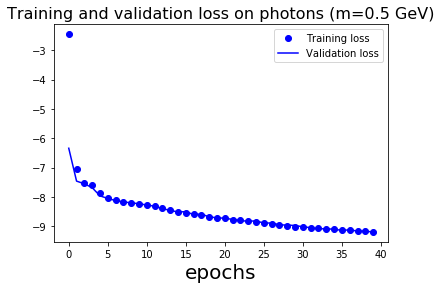

In [13]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(40)
plt.figure()
plt.plot(epochs, np.log(loss), 'bo', label='Training loss')
plt.plot(epochs, np.log(val_loss), 'b', label='Validation loss')
plt.title('Training and validation loss on photons (m=0.5 GeV)',fontsize=16)
plt.xlabel('epochs', fontsize=20)
plt.savefig('training-validation-loss-0.5GeV.png')
plt.legend()
plt.show()

In [14]:
def comp_loss(array):
        N = len(array)
        predicteds = autoencoder.predict(array)
        avg_array = np.array([])
        for i in range(N):
                diff = array[i] - predicteds[i]
                s_diff = np.sum(diff * diff)
#                s_diff = np.sum(diff)
                avg = s_diff/float(array.shape[1]*array.shape[1])
                avg_array = np.append(avg_array,avg)

        return avg_array


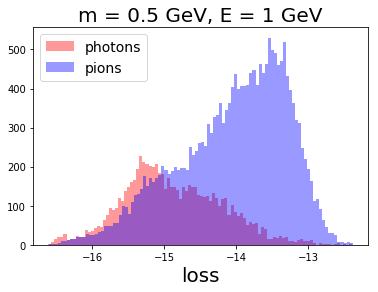

In [15]:
loss_sig = comp_loss(x_test_photons)
loss_bkg = comp_loss(data_pions)

plt.hist(np.log(loss_sig),bins=100,color="R",alpha=0.4)
plt.hist(np.log(loss_bkg),bins=100,color="B",alpha=0.4)
plt.legend(['photons','pions'],fontsize=14)
plt.title('m = 0.5 GeV, E = 1 GeV',fontsize=20)

plt.xlabel('loss', fontsize=20)
plt.savefig('signal_vs_bkg_0.5GeV.png')